In [45]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, ForeignKey, func, inspect
from sqlalchemy import MetaData
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy.ext.declarative import declarative_base

import pandas as pd
import numpy as np
import datetime as dt

import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [46]:
engine = create_engine("sqlite:///hawaii_3.sqlite")

In [47]:
conn = engine.connect()
inspector = inspect(engine)

In [48]:
base = automap_base()
base.prepare(engine, reflect=True)
base.classes.keys()

['measurements', 'stations']

In [49]:
Measurements = base.classes.measurements
Stations = base.classes.stations

In [50]:
session = Session(engine)

In [60]:
prev_year_date = dt.date.today() - dt.timedelta(days=365)
prev_year_date

datetime.date(2017, 5, 16)

In [53]:
rain=session.query(Measurements.date, Measurements.prcp).filter(Measurements.date > prev_year_date).\
    order_by(Measurments.date).all()
rain

[(datetime.date(2017, 5, 17), 0.0),
 (datetime.date(2017, 5, 17), 0.02),
 (datetime.date(2017, 5, 17), 0.0),
 (datetime.date(2017, 5, 17), 0.0),
 (datetime.date(2017, 5, 17), 0.07),
 (datetime.date(2017, 5, 17), 0.06),
 (datetime.date(2017, 5, 18), 0.01),
 (datetime.date(2017, 5, 18), 0.09),
 (datetime.date(2017, 5, 18), 0.16),
 (datetime.date(2017, 5, 18), 0.46),
 (datetime.date(2017, 5, 18), 0.13),
 (datetime.date(2017, 5, 18), 0.0),
 (datetime.date(2017, 5, 19), 0.0),
 (datetime.date(2017, 5, 19), 0.02),
 (datetime.date(2017, 5, 19), 0.01),
 (datetime.date(2017, 5, 19), 0.01),
 (datetime.date(2017, 5, 20), 0.0),
 (datetime.date(2017, 5, 20), 0.0),
 (datetime.date(2017, 5, 20), 0.01),
 (datetime.date(2017, 5, 20), 0.02),
 (datetime.date(2017, 5, 21), 0.0),
 (datetime.date(2017, 5, 21), 0.0),
 (datetime.date(2017, 5, 21), 0.0),
 (datetime.date(2017, 5, 21), 0.01),
 (datetime.date(2017, 5, 21), 0.0),
 (datetime.date(2017, 5, 22), 0.0),
 (datetime.date(2017, 5, 22), 0.0),
 (datetime.dat

In [64]:
rain_df = pd.DataFrame(rain)
rain_df.head()

,date,prcp
0,2017-05-17,0.00
1,2017-05-17,0.02
2,2017-05-17,0.00
3,2017-05-17,0.00
4,2017-05-17,0.07


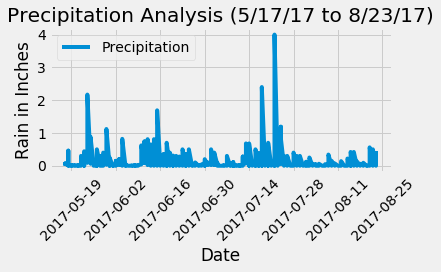

In [66]:
rain_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis (5/17/17 to 8/23/17)")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [74]:
#unique station count
unique_stations = session.query(Measurments).group_by(Measurments.station).count()
unique_stations

9

In [68]:
#Create list of most active stations
most_active_station = session.query(Measurments.station, Stations.name, func.count(Measurments.tobs)).filter(Measurments.station == Stations.station).group_by(Measurments.station).order_by(func.count(Measurments.tobs).desc()).all()
most_active_station

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2696),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2685),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2572),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2484),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 1937),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1932),
 ('USC00517948', 'PEARL CITY, HI US', 683),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 342)]

In [96]:
#Create list of waihee observations
waihee_tobs = session.query(Measurments.tobs).filter(Measurments.station == "USC00519281", Measurments.station == Stations.station, Measurments.date >="2017-05-16", Measurments.date <="2018-05-15").all()

In [97]:
#Turn list of waihee observations into a simple list of temps
waihee_temps = [temp[0] for temp in waihee_tobs]

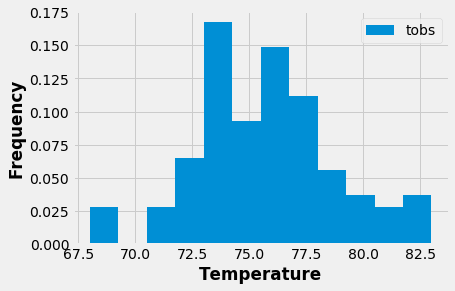

In [98]:
#Plot histogram of temps observed in waihee over the last year
plt.hist(waihee_temps, normed=True, bins=12)
plt.ylabel('Frequency', weight='bold')
plt.xlabel('Temperature', weight='bold')
plt.legend(['tobs'])

In [101]:
#Create calculator for determining temps during trip dates last year

def calc_temps(start, end):
    
        start_date_lastyear=(dt.datetime.strptime(start_date, '%Y-%m-%d'))-dt.timedelta(days=365)
        end_date_lastyear=(dt.datetime.strptime(end_date, '%Y-%m-%d'))-dt.timedelta(days=365)
    
        min_temp=session.query(func.avg(Measurments.tobs)).filter(Measurments.date >=start_date_lastyear).filter(Measurments.date <= end_date_lastyear).group_by(Measurments.date).order_by(func.avg(Measurments.tobs)).first()

    
        max_temp=session.query(func.avg(Measurments.tobs)).filter(Measurments.date >=start_date_lastyear).filter(Measurments.date <= end_date_lastyear).group_by(Measurments.date).order_by(func.avg(Measurments.tobs).desc()).first()
    
        avg_temp=session.query(func.avg(Measurments.tobs)).filter(Measurments.date >=start_date_lastyear).filter(Measurments.date <= end_date_lastyear).all()
        
        return min_temp, max_temp, avg_temp
    

start='2018-05-17'
end='2018-05-25'
min_temp, max_temp, avg_temp = calc_temps(start, end)
print (min_temp, max_temp, avg_temp)

(63.285714285714285,) (75.16666666666667,) [(67.97058823529412,)]


C:\Users\zulim2\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


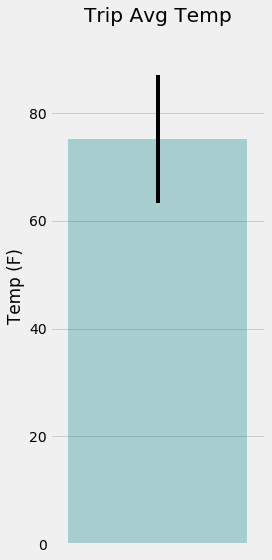

In [111]:
#Plot the results of calc_temps in a boxplot

fig, ax = plt.subplots(figsize=plt.figaspect(2))
xpos = 1
yerr = max_temp[0]-min_temp[0]
bar = ax.bar(xpos, max_temp, yerr=yerr, alpha=0.3, color='teal', align="center")
ax.set(xticks=range(xpos), xticklabels="a", title="Trip Avg Temp", ylabel="Temp (F)")
ax.margins(.1, .1)

fig.tight_layout()
fig.show()